In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from keras import Input

seq_model = Sequential()
seq_model.add(layers.Dense(32,activation='relu',input_shape=(64,)))
seq_model.add(layers.Dense(32,activation='relu'))
seq_model.add(layers.Dense(10,activation='softmax'))

input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation = 'relu')(input_tensor)
x = layers.Dense(32, activation = 'relu')(x)
output_tensor = layers.Dense(10,activation = 'softmax')(x)

model = Model(input_tensor,output_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


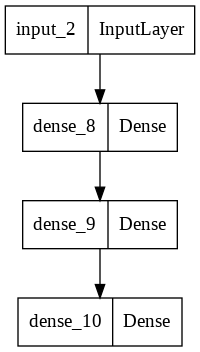

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape = (784,),name = 'digits')
x = layers.Dense(64, activation = 'relu',name = 'dense_1')(inputs)
x = layers.Dense(64, activation = 'relu',name = 'dense_2')(x)
outputs = Dense(10,activation = 'softmax',name='predictions')(x)

model = Model(inputs = inputs, outputs = uutputs)

In [ ]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
# 훈련 구성
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs=2,
    validation_data = (x_val,y_val)
)

In [ ]:
results = model.evaluate(x_test,y_test)

In [ ]:
# 다중 입력모델
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

# 텍스트 입력은 길이가 정해지지 않은 정수 시퀀스
text_input = Input(shape = (None, ), dtype = 'int32', name = 'text')

# 크기 64의 벡터 시퀀스로 임베딩
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)

# LSTM을 사용하여 이 벡터들을 하나의 벡터로 인코딩
encoded_text = layers.LSTM(32)(embedded_text)

# 질문도 텍스트와 동일한 과정을 거친다
question_input = Input(shape = (None, ), dtype = 'int32', name = 'question')
embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

# 인코딩된 질문과 텍스트를 연결
# axis = -1은 가장 낮은 차원에서부터 시작. 자료가 2차원이고 axis = -1이면 1차원에서 붙이라는 의미이다.
concatenated = layers.concatenate([encoded_text, encoded_question], axis = -1)

answer = layers.Dense(answer_vocabulary_size, activation = 'softmax')(concatenated)

model = Model([text_input, question_input], answer)
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

[과제] 입력이 2개인 모델에 대하여 훈련을 수행하세요.
- num_samples = 1000, max_length = 100

다중모델 출력
- 소셜 미디어에서 익명 사용자의 포스트를 입력으로 받아 그 사람의 나이, 성별, 소득 수준 등을 예측

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense
vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = Embedding(vocabulary_size,256)(posts_input)
x = Conv1D(128,5,activation='relu')(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dense(128, activation='relu')(x)

age_prediction = Dense(1,name='age')(x)
income_prediction = Dense(num_income_groups,activation='softmax',name='income')(x)
gender_prediction = Dense(1, activation='sigmoid',name='gender')(x)

model = Model(posts_input,[age_prediction, income_prediction, gender_prediction])

model.compile(optimizer = 'rmsprop',
              loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])


In [ ]:
model.fit(posts, [ate_targets, income_targets, gender_targets], epochs=10,batch_size=64)